## Messung der Boltzmannkonstante
### Teil II Thermisches Rauschen

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline

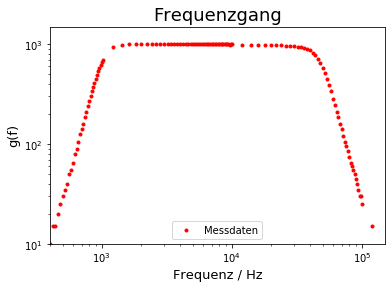

In [2]:
f, U_aus = np.loadtxt('./data.txt', skiprows = 1, usecols = (0,1), unpack = True)
D = 1e-3
U_ein = 0.2
g = U_aus/(U_ein * D)



plt.loglog(f,g, linestyle = 'None', label = 'Messdaten', marker = '.', color = 'red')
plt.axis([4.0E2, 1.5e5, 10, 1.5E3])
plt.xlabel('Frequenz / Hz', fontsize = 13)
plt.ylabel('g(f)', fontsize = 13)
plt.title('Frequenzgang', fontsize = 18)
plt.legend(loc = 'best')

plt.show()

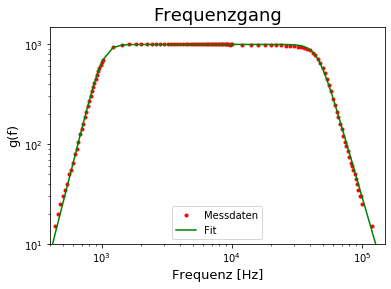

In [3]:
#Graphische Darstellung der Messdaten und Fit

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from scipy.stats import chi2

f, U_aus = np.loadtxt('./data.txt', skiprows = 1, usecols = (0,1), unpack = True)
D = 1e-3
U_ein = 0.2
g = U_aus/(U_ein * D)

def fit_func(f,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))
p0 = [1000, 1000, 50000, 5, 5]
popt, pcov = curve_fit(fit_func, f[17:-43], g[17:-43], p0)

plt.loglog(f[17:-43],g[17:-43], linestyle = 'None', label = 'Messdaten', marker = '.', color = 'red')
plt.loglog(f, fit_func(f, *popt), label = 'Fit', color = 'green')
plt.axis([4.0E2, 1.5e5, 10, 1.5E3])
plt.xlabel('Frequenz [Hz]', fontsize = 13)
plt.ylabel('g(f)', fontsize = 13)
plt.title('Frequenzgang', fontsize = 18)
plt.legend(loc = 'best')

plt.show()

In [4]:
#Numerische Integration

def fit_func_square(f,V,W1,W2,n1,n2):
    return fit_func(f,V,W1,W2,n1,n2)**2

B=integrate.quad(fit_func_square, f[17], f[-43], args=tuple(popt))
print('Das Integral beträgt: {value:.4e}'.format(value=B[0]))

Das Integral beträgt: 4.5454e+10


m =  0.0007927711757731675
Fehler der Steigung =  2.1774429121597486e-06


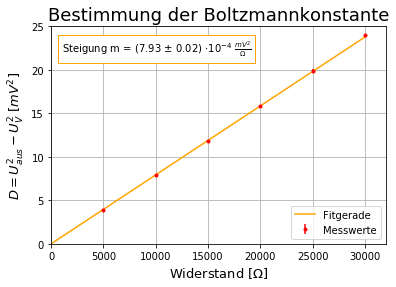

In [5]:
#Bestimmung der Boltzmannkonstante

R=np.array([5e3 , 10e3 , 15e3 , 20e3 , 25e3 , 30e3])
U_aus=np.array([2.4267,3.1361,3.7116,4.2183,4.6774,5.094])
fehler_U_aus=np.array([0.00734,0.00947,0.01122,0.01276,0.01412,0.01541]) #Formel steht in der Auswertung
U_V=1.3979
D=U_aus**2-U_V**2
fehler_D=np.sqrt((2*U_aus*fehler_U_aus)**2+(2*U_V*0.00423)**2)

def linear(x,c):
    return c*x

popt, pcov = curve_fit(linear, R, D, sigma = fehler_D)
print('m = ', popt[0])
print('Fehler der Steigung = ', np.sqrt(pcov[0][0]))

l = np.linspace(0,30000,1000000)
plt.errorbar(R, D, yerr=fehler_D, fmt='.', label = 'Messwerte', color = 'red')
plt.plot(l, linear(l, *popt), label = 'Fitgerade', color = 'orange')
plt.axis([0,3.2e4,0,25])
plt.grid()
plt.xlabel('Widerstand [$\Omega$]', fontsize = 13)
plt.ylabel('$D = U^2_{aus}-U^2_{V}$ $[mV^2]$', fontsize = 13)
plt.legend(loc = 4)
plt.text(1000, 22, 'Steigung m = (7.93 $\pm$ 0.02) $\\cdot10^{-4}$ $\\frac{mV^2}{\Omega}$', 
         bbox = dict(boxstyle = 'square', pad = 0.4, ec = 'orange', fc = (1.0,1.0,1.0), lw = 1), fontsize = 10)
plt.title('Bestimmung der Boltzmannkonstante', fontsize = 18)

plt.show()

In [6]:
#Chi

chisquare=np.sum(((linear(R,*popt)-D)**2/fehler_D**2))
dof=5
chisquare_red=chisquare/dof
print('chi^2: ', chisquare)
print('chi^2 red: ', chisquare_red)
prob=round(1-chi2.cdf(chisquare,dof),2)*100
print("Wahrscheinlichkeit="+str(prob)+"%")

chi^2:  4.332331712707117
chi^2 red:  0.8664663425414234
Wahrscheinlichkeit=50.0%
